# Problem Setting: Representation Learning.

This notebook demonstrates that the Deep Boltzmann Machines(DBM) can learn images and reconstruct its. Image dataset for this demo is the MNIST. The code of this notebook is written on the premise that the MNIST images are divided and arranged in directories for each label beforehand.

## Problem Solution: Deep Boltzmann Machines(DBM).

As is well known, DBM is composed of layers of RBMs stacked on top of each other(Salakhutdinov, R., & Hinton, G. E. 2009). This model is a structural expansion of Deep Belief Networks(DBN), which is known as one of the earliest models of Deep Learning(Le Roux, N., & Bengio, Y. 2008). Like RBM, DBN places nodes in layers. However, only the uppermost layer is composed of undirected edges, and the other consists of directed edges.

According to graph theory, the structure of RBM corresponds to a complete bipartite graph which is a special kind of bipartite graph where every node in the visible layer is connected to every node in the hidden layer. Based on statistical mechanics and thermodynamics(Ackley, D. H., Hinton, G. E., & Sejnowski, T. J. 1985), the state of this structure can be reflected by the energy function.

In relation to RBM, the Contrastive Divergence(CD) is a method for approximation of the gradients of the log-likelihood(Hinton, G. E. 2002).This algorithm draws a distinction between a positive phase and a negative phase. Conceptually, the positive phase is to the negative phase what waking is to sleeping.

The procedure of this method is similar to Markov Chain Monte Carlo method(MCMC). However, unlike MCMC, the visbile variables to be set first in visible layer is not randomly initialized but the observed data points in training dataset are set to the first visbile variables. And, like Gibbs sampler, drawing samples from hidden variables and visible variables is repeated k times. Empirically (and surprisingly), `k` is considered to be `1`.

As a simple example, this notebook attempts to train a sample sampled from a Gaussian distribution.

### Modeling and Implementation.

Firstly, import Python modules for building the Deep Boltzmann Machines.

In [1]:
from accelbrainbase.iteratabledata._mxnet.gauss_iterator import GaussIterator
from accelbrainbase.noiseabledata._mxnet.gauss_noise import GaussNoise
from accelbrainbase.observabledata._mxnet.restrictedboltzmannmachines.deep_boltzmann_machines import DeepBoltzmannMachines
from accelbrainbase.observabledata._mxnet.restricted_boltzmann_machines import RestrictedBoltzmannMachines
from accelbrainbase.computableloss._mxnet.l2_norm_loss import L2NormLoss

In [3]:
import mxnet as mx
import mxnet.ndarray as nd
import numpy as np
import pandas as pd

If you want to observe the learning log, set `getLogger`.

In [2]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("accelbrainbase")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

Build and initialize `GaussIterator`, specifying parameters such as parameters of Gauss noise.

In [4]:
gauss_iterator = GaussIterator(
    # `float` of mean (“centre”) of the distribution.
    loc=0.0,
    # `float` of standard deviation (spread or “width”) of the distribution.
    std=1.0,
    # `int` of dimension of sample data.
    dim=1000,
    # `int` of epochs.
    epochs=10000,
    # `int` batch size.
    batch_size=40,
    # How to normalize pixel values of images.
    # - `z_score`: Z-Score normalization.
    # - `min_max`: Min-max normalization.
    # - others : This class will not normalize the data.
    norm_mode="min_max",
    # `float` of scaling factor for data.
    scale=1.0,
    # is-a `NoiseableData`.
    noiseable_data=GaussNoise(sigma=1e-03, mu=0.0),
)

Build and initialize loss function.

In [5]:
computable_loss = L2NormLoss()

Build and initialize `RestrictedBoltzmannMachines`s.

In [6]:
RBM_1 = RestrictedBoltzmannMachines(
    # is-a `ComputableLoss`.
    computable_loss=computable_loss,
    # `mxnet.ndarray.Activation` or `mxnet.symbol.Activation` in visible layer.
    visible_activation="sigmoid",
    # `mxnet.ndarray.Activation` or `mxnet.symbol.Activation` in hidden layer.
    hidden_activation="sigmoid",
    # `int` of dimension in visible layer.
    visible_dim=1000,
    # `int` of dimension in hidden layer.
    hidden_dim=100,
    # `float` of dropout rate in visible layer.
    visible_dropout_rate=0.0,
    # `float` of dropout rate in hidden layer.
    hidden_dropout_rate=0.0,
    # `gluon.nn.BatchNorm` in visible layer.
    visible_batch_norm=None,
    # `gluon.nn.BatchNorm` in hidden layer.
    hidden_batch_norm=None,
    # `mx.gpu()` or `mx.cpu()`.
    ctx=mx.gpu(),
)

RBM_2 = RestrictedBoltzmannMachines(
    # is-a `ComputableLoss`.
    computable_loss=computable_loss,
    # `mxnet.ndarray.Activation` or `mxnet.symbol.Activation` in visible layer.
    visible_activation="sigmoid",
    # `mxnet.ndarray.Activation` or `mxnet.symbol.Activation` in hidden layer.
    hidden_activation="sigmoid",
    # `int` of dimension in visible layer.
    visible_dim=100,
    # `int` of dimension in hidden layer.
    hidden_dim=100,
    # `float` of dropout rate in visible layer.
    visible_dropout_rate=0.0,
    # `float` of dropout rate in hidden layer.
    hidden_dropout_rate=0.0,
    # `gluon.nn.BatchNorm` in visible layer.
    visible_batch_norm=None,
    # `gluon.nn.BatchNorm` in hidden layer.
    hidden_batch_norm=None,
    # `mx.gpu()` or `mx.cpu()`.
    ctx=mx.gpu(),
)

RBM_3 = RestrictedBoltzmannMachines(
    # is-a `ComputableLoss`.
    computable_loss=computable_loss,
    # `mxnet.ndarray.Activation` or `mxnet.symbol.Activation` in visible layer.
    visible_activation="sigmoid",
    # `mxnet.ndarray.Activation` or `mxnet.symbol.Activation` in hidden layer.
    hidden_activation="sigmoid",
    # `int` of dimension in visible layer.
    visible_dim=100,
    # `int` of dimension in hidden layer.
    hidden_dim=1000,
    # `float` of dropout rate in visible layer.
    visible_dropout_rate=0.0,
    # `float` of dropout rate in hidden layer.
    hidden_dropout_rate=0.0,
    # `gluon.nn.BatchNorm` in visible layer.
    visible_batch_norm=None,
    # `gluon.nn.BatchNorm` in hidden layer.
    hidden_batch_norm=None,
    # `mx.gpu()` or `mx.cpu()`.
    ctx=mx.gpu(),
)

Build and initialize `DeepBoltzmannMachines`, delegating `list` of `RestrictedBoltzmannMachines`s.

In [7]:
DBM = DeepBoltzmannMachines(
    # is-a `ComputableLoss`.
    computable_loss=computable_loss,
    # `list` of `RestrictedBoltzmannMachines`s.
    rbm_list=[
        RBM_1,
        RBM_2,
        RBM_3
    ],
    # is-a `mxnet.initializer` for parameters of model. If `None`, it is drawing from the Xavier distribution.
    initializer=None,
    # `str` of name of optimizer.
    optimizer_name="Adam",
    # `float` of learning rate.
    learning_rate=1e-03,
    # `float` of attenuate the `learning_rate` by a factor of this value every `attenuate_epoch`.
    learning_attenuate_rate=1.0,
    # `int` of attenuate the `learning_rate` by a factor of `learning_attenuate_rate` every `attenuate_epoch`.
    attenuate_epoch=50,
)

Start learning.

In [8]:
DBM.learn(gauss_iterator)

Epoch: 100 Train loss: 0.0012600279 Test loss: 0.0009863755
Epoch: 200 Train loss: 0.0009124829 Test loss: 0.0009858222
Epoch: 300 Train loss: 0.00073830277 Test loss: 0.0011751417
Epoch: 400 Train loss: 0.0008954682 Test loss: 0.0010014875
Epoch: 500 Train loss: 0.0008823477 Test loss: 0.00071658683
Epoch: 600 Train loss: 0.0007359229 Test loss: 0.00056723476
Epoch: 700 Train loss: 0.00084609655 Test loss: 0.0006721969
Epoch: 800 Train loss: 0.00070735556 Test loss: 0.00075290125
Epoch: 900 Train loss: 0.0008967077 Test loss: 0.0010541372
Epoch: 1000 Train loss: 0.0008268699 Test loss: 0.00039934245
Epoch: 1100 Train loss: 0.0005464133 Test loss: 0.0005217896
Epoch: 1200 Train loss: 0.000609399 Test loss: 0.00080017775
Epoch: 1300 Train loss: 0.00055293005 Test loss: 0.00077352393
Epoch: 1400 Train loss: 0.0006295765 Test loss: 0.00096744794
Epoch: 1500 Train loss: 0.00048343604 Test loss: 0.000703053
Epoch: 1600 Train loss: 0.00073716923 Test loss: 0.00081935304
Epoch: 1700 Train los

Visualize reconstruction losses.

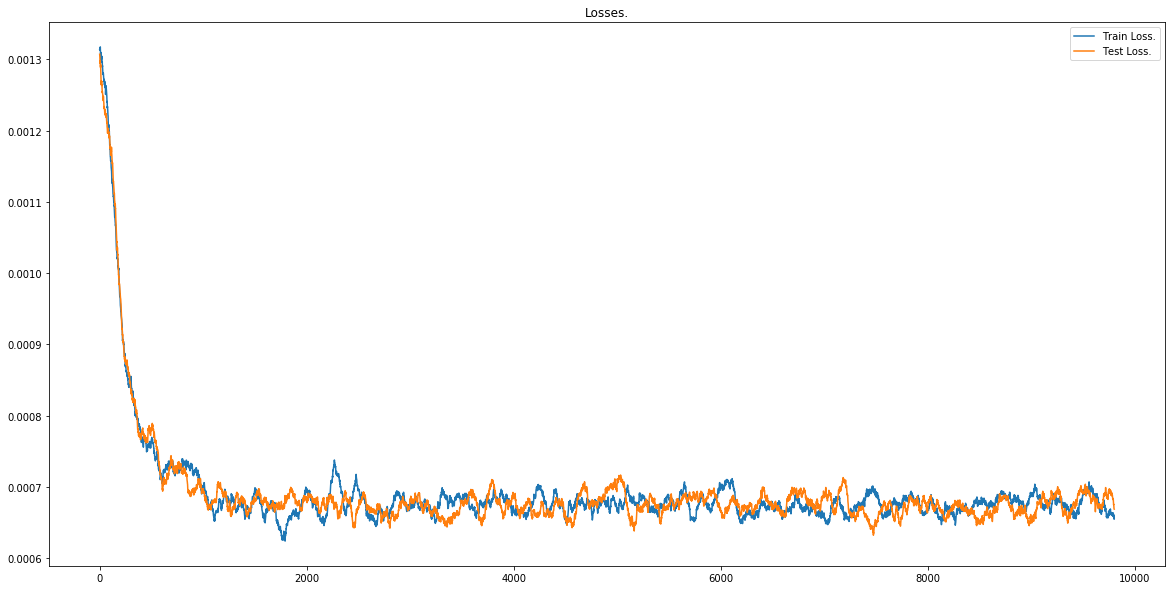

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def moving_avg(arr, window=100):
    return np.convolve(arr, np.ones(window) / window, mode='same')[window:-window]

plt.figure(figsize=(20, 10))
plt.plot(moving_avg(DBM.loss_arr[:, 0]), label="Train Loss.")
plt.plot(moving_avg(DBM.loss_arr[:, 1]), label="Test Loss.")
plt.legend()
plt.title("Losses.")
plt.show()

Let the model observe the test data and extract the feature points to see.

In [14]:
test_arr = None
for _, _, _test_arr, _ in gauss_iterator.generate_learned_samples():
    test_arr = _test_arr
    break

In [15]:
_ = DBM.inference(test_arr)

In [13]:
DBM.rbm_list[0].feature_points_arr


[[0.53305787 0.5756622  0.53904593 ... 0.48379418 0.56888074 0.46843958]
 [0.52959603 0.5736565  0.5394453  ... 0.48382154 0.57105815 0.4689399 ]
 [0.5276896  0.5736581  0.54423493 ... 0.48047966 0.5716327  0.46266147]
 ...
 [0.52691394 0.5753328  0.5434538  ... 0.4846833  0.5685017  0.46859318]
 [0.5331989  0.5735092  0.541222   ... 0.47389784 0.5706038  0.46692663]
 [0.5271497  0.5720202  0.5430958  ... 0.48016372 0.5731069  0.46146354]]
<NDArray 40x100 @gpu(0)>

## For ML Ops.

This model inherits [HybridBlock](https://gluon.mxnet.io/chapter07_distributed-learning/hybridize.html) from [mxnet.gluon](https://mxnet.incubator.apache.org/api/python/docs/api/gluon/index.html). Functions for common ML Ops such as saving and loading parameters are provided by [HybridBlock](https://mxnet.apache.org/api/python/docs/api/gluon/hybrid_block.html).

# References

- Ackley, D. H., Hinton, G. E., & Sejnowski, T. J. (1985). A learning algorithm for Boltzmann machines. Cognitive science, 9(1), 147-169.
- Hinton, G. E. (2002). Training products of experts by minimizing contrastive divergence. Neural computation, 14(8), 1771-1800.
- Le Roux, N., & Bengio, Y. (2008). Representational power of restricted Boltzmann machines and deep belief networks. Neural computation, 20(6), 1631-1649.
- Salakhutdinov, R., & Hinton, G. E. (2009). Deep boltzmann machines. InInternational conference on artificial intelligence and statistics (pp. 448-455).